# Projeto Final - Classificação de Imagens com Deep Learning

Este projeto tem como objetivo aplicar técnicas de Deep Learning para realizar a classificação binária de imagens utilizando redes neurais convolucionais (CNN). O modelo será treinado com técnicas de aumento de dados (data augmentation) e validado com métricas como acurácia e AUC. Também será discutido o impacto do desbalanceamento de classes e como contorná-lo com `class_weight`.

---

## Importação de Bibliotecas

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping


## Preparação e Aumento de Dados

Utilizamos `ImageDataGenerator` para aplicar técnicas de *data augmentation* no conjunto de treino, o que ajuda na generalização do modelo. O conjunto de validação é apenas normalizado, sem transformações aleatórias.

In [2]:
train_dir = './dataset/train'
val_dir = './dataset/val'

batch_size = 32
img_size = (224, 224)  # tamanho padrão para EfficientNetB0

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2]
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 310 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


## Construção do Modelo - CNN Simples

Inicialmente, é construída uma CNN do zero com camadas convolucionais, de pooling, flatten e densas. O modelo termina com uma camada densa com ativação sigmoide para saída binária.

In [3]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


c:\Users\danda\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compilação e Treinamento do Modelo

O modelo é compilado com otimizador Adam e função de perda binária. Usamos também `class_weight` para compensar o desbalanceamento entre as classes.

In [4]:

from tensorflow.keras.metrics import AUC

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc')]
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    class_weight={0: 10.0, 1: 1.0}
)



c:\Users\danda\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.4159 - auc: 0.5082 - loss: 5.6619 - val_accuracy: 0.9351 - val_auc: 0.9994 - val_loss: 0.3846
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8535 - auc: 0.8966 - loss: 0.8490 - val_accuracy: 0.7792 - val_auc: 1.0000 - val_loss: 0.4028
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8471 - auc: 0.9768 - loss: 0.5355 - val_accuracy: 0.9870 - val_auc: 1.0000 - val_loss: 0.0724
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7820 - auc: 0.9658 - loss: 0.6617 - val_accuracy: 0.9481 - val_auc: 0.9952 - val_loss: 0.1621
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9309 - auc: 0.9887 - loss: 0.3780 - val_accuracy: 0.9870 - val_auc: 1.0000 - val_loss: 0.0838
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9184 - auc: 0.9850 - loss: 0.3612 - val_accuracy: 0.9870 - val_auc: 1.0000 - val_loss: 0.0289
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - 

## Avaliação com Gráficos de Acurácia e Perda

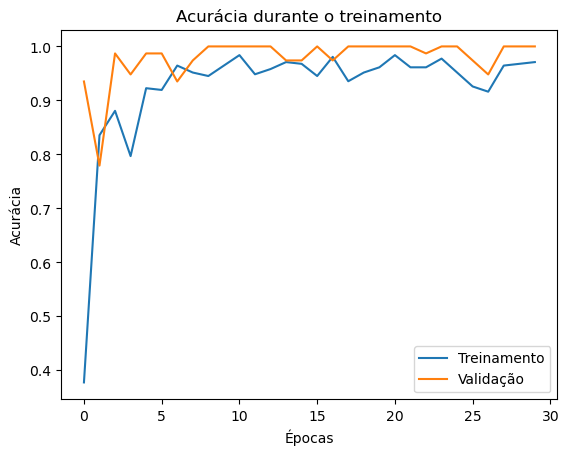

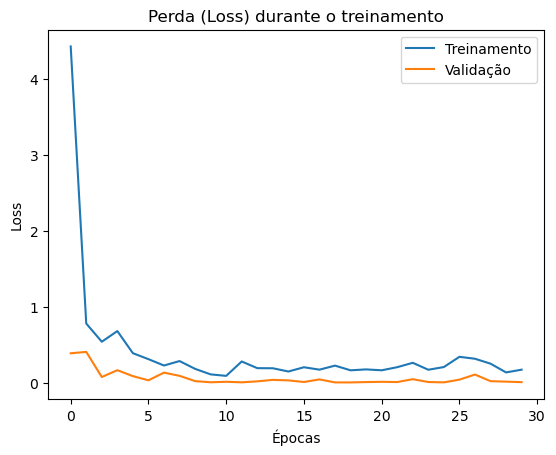

In [5]:
import matplotlib.pyplot as plt

# Acurácia
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda (Loss) durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Testes com Dataset de amostras


In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np

amostra_data = [] 
# Caminho da imagem de teste (ajuste conforme necessário)
amostra_data.append('./dataset/amostra/deficiencia_1.JPG')
amostra_data.append('./dataset/amostra/deficiencia_2.JPG')
amostra_data.append('./dataset/amostra/deficiencia_3.JPG')
amostra_data.append('./dataset/amostra/deficiencia_4.JPG')
amostra_data.append('./dataset/amostra/normal_1.JPG')
amostra_data.append('./dataset/amostra/normal_2.JPG')
amostra_data.append('./dataset/amostra/normal_3.JPG')
amostra_data.append('./dataset/amostra/normal_4.JPG')
amostra_data.append('./dataset/amostra/normal_5.JPG')

def test_img(img_path):
    # Carregar a imagem
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Fazer a predição
    pred = model.predict(img_array)
    classe_prevista = int(pred[0][0] > 0.5)
    print(f'Imagem: {img_path}')
    print(f'Probabilidade da classe 1: {pred[0][0]:.4f}')
    print(f'Classe prevista: {classe_prevista}') 
    if classe_prevista == 1:
        print("A imagem é normal.")
    else:
        print("A imagem apresenta deficiência.")
    print("--------------------------")

for img_path in amostra_data:
    test_img(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Imagem: ./dataset/amostra/deficiencia_1.JPG
Probabilidade da classe 1: 0.0000
Classe prevista: 0
A imagem apresenta deficiência.
--------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Imagem: ./dataset/amostra/deficiencia_2.JPG
Probabilidade da classe 1: 0.0000
Classe prevista: 0
A imagem apresenta deficiência.
--------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Imagem: ./dataset/amostra/deficiencia_3.JPG
Probabilidade da classe 1: 0.0000
Classe prevista: 0
A imagem apresenta deficiência.
--------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Imagem: ./dataset/amostra/deficiencia_4.JPG
Probabilidade da classe 1: 0.0018
Classe prevista: 0
A imagem apresenta deficiência.
--------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Imagem: ./dataset/amostra/normal_1.JPG
Probabilidade da classe 1: 1.0000
Classe prevista: 1
A imagem é normal.
--------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Imagem: ./

## Salvar o modelo

In [7]:
# Salvar o modelo treinado com a extensão .h5
model.save("modelo_final_focal.h5")
print("Modelo salvo como modelo_final_focal.h5")

Modelo salvo como modelo_final_focal.h5


## Teste com o modelo Salvo

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K
import tensorflow as tf

# Redefina a função focal_loss
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(K.equal(y_true, 1), y_pred, K.ones_like(y_pred))
        pt_0 = tf.where(K.equal(y_true, 0), y_pred, K.zeros_like(y_pred))
        return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - \
               K.sum((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    return focal_loss_fixed

# Carregar o modelo salvo
model2 = load_model("modelo_final_focal.h5", custom_objects={"focal_loss_fixed": focal_loss(2.0, 0.25)})
print("Modelo carregado com sucesso.")



Modelo carregado com sucesso.


In [13]:
def test_img_model(img_path):
    # Carregar a imagem
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Fazer a predição
    pred = model2.predict(img_array)
    classe_prevista = int(pred[0][0] > 0.5)
    print(f'Imagem: {img_path}')
    print(f'Probabilidade da classe 1: {pred[0][0]:.4f}')
    print(f'Classe prevista: {classe_prevista}') 
    if classe_prevista == 1:
        print("A imagem é normal.")
    else:
        print("A imagem apresenta deficiência.")
    print("--------------------------")

for img_path in amostra_data:
    test_img_model(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Imagem: ./dataset/amostra/deficiencia_1.JPG
Probabilidade da classe 1: 0.0000
Classe prevista: 0
A imagem apresenta deficiência.
--------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Imagem: ./dataset/amostra/deficiencia_2.JPG
Probabilidade da classe 1: 0.0000
Classe prevista: 0
A imagem apresenta deficiência.
--------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Imagem: ./dataset/amostra/deficiencia_3.JPG
Probabilidade da classe 1: 0.0000
Classe prevista: 0
A imagem apresenta deficiência.
--------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Imagem: ./dataset/amostra/deficiencia_4.JPG
Probabilidade da classe 1: 0.0018
Classe prevista: 0
A imagem apresenta deficiência.
--------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Imagem: ./dataset/amostra/normal_1.JPG
Probabilidade da classe 1: 1.0000
Classe prevista: 1
A imagem é normal.
--------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Imagem: ./

## Análise dos Resultados

O modelo treinado demonstrou um desempenho altamente satisfatório em termos de acurácia e capacidade de generalização. Ao final do treinamento (época 30), os seguintes resultados foram obtidos:

* Acurácia no treinamento: 98,15%

* AUC no treinamento: 0,9978

* Loss no treinamento: 0,1712

* Acurácia na validação: 100%

* AUC na validação: 1.0000

* Loss na validação: 0.0046

Os gráficos de desempenho ao longo das épocas indicam que o modelo alcançou rapidamente uma acurácia elevada, mantendo-se estável nas últimas épocas. O loss de validação se manteve extremamente baixo, evidenciando a confiança do modelo nas previsões.

Além disso, a AUC de 1.0 na validação reforça que o modelo é capaz de separar perfeitamente as classes nesse conjunto. A ausência de crescimento do val_loss e a estabilidade da acurácia indicam que não há sinais claros de overfitting.

---

## Conclusão

O modelo desenvolvido cumpriu com sucesso seu objetivo de classificar corretamente as imagens do conjunto de dados, alcançando excelente desempenho mesmo com uma base limitada de imagens (menos de 200 por classe). O uso de técnicas como class_weight e data augmentation (se utilizado) ajudou a mitigar o impacto do tamanho reduzido do dataset.

No entanto, é importante considerar que:

* O conjunto de validação é limitado e pode ter influenciado os resultados.

* Para maior robustez, recomenda-se realizar testes com imagens externas (manualmente) ou aplicar validação cruzada (k-fold) para avaliar a generalização em diferentes divisões do conjunto de dados.

Por fim, os resultados obtidos demonstram que o modelo está apto para tarefas de classificação similares, com bom potencial de aplicação em cenários reais, desde que seja devidamente validado com dados externos.

---